In [1]:
import netCDF4 as nc
import matplotlib.pyplot as plt
from matplotlib.colors import from_levels_and_colors
import numpy as np
from matplotlib import animation
from matplotlib.colors import BoundaryNorm
import matplotlib.colors as cols
import matplotlib as mpl
from mpl_toolkits.basemap import Basemap
from matplotlib import ticker, cm
import seaborn as sns

In [2]:
data1=nc.Dataset('/ihesp/user/xiliangdiao/ihespdata/ocn1/z_t.nc')
C = data1.variables['z_t'][:]/100
#B = C[0:42]

In [3]:
months = [f"{x:02d}" for x in range(1,13)]
years = [f"{x:04d}" for x in range(41,61)]
i =0
result = np.zeros((240,62))

In [4]:
for yy in years:
    for mm in months:
        data=nc.Dataset('/ihesp/user/xiliangdiao/ihespdata/ocn300/B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.pop.h.'+yy+'-'+mm +'.TEMP.nc')
        plotvar = data.variables['TEMP'][0,:,:]
        plotvar[plotvar == -1.0] = np.nan
        lont = data.variables['TLONG']
        latt = data.variables['TLAT']
        lont = lont[201:365,650:900]
        latt = latt[201:365,650:900]
        plotvar = plotvar[:,201:365,650:900]
        aveplot = plotvar.mean(axis=1)
        aveplot = aveplot.mean(axis=1)
        result[i] = aveplot[0:62]
        
        i = i + 1
#********************************************************************

In [5]:
A = np.arange(240)
#B = np.arange(62)
xx, yy = np.meshgrid(C, A)

In [17]:
nice_cmap=sns.diverging_palette(245, 15, n=13,as_cmap=True)
#nice_cmap=sns.diverging_palette(245, 10, n=10,as_cmap=True)
lev_cmap = nice_cmap([1,30,50,100,130,140,150,170,190,210,230,240]) 
new_cmap = cols.ListedColormap(lev_cmap,"praj_cmap")
my_font = {'fontname':'Cambria', 'size':'20'}
nice_levels = [-1.05,-1.0,-0.95,-0.9,-0.85,-0.8,-0.75,-0.7,-0.65,-0.6,-0.55,-0.5,-0.45,-0.4,-0.35,-0.3]
nice_levels = [-1.8,-1.7,-1.6,-1.5,-1.4,-1.3,-1.2,-1.1,-1.0,-0.9,-0.8,-0.7,-0.6,-0.5,-0.4,-0.3]
#nice_levels = [-0.1,-0.08,-0.06,-0.04,-0.02,0,0.02,0.04,0.06,0.08,0.1]

/scratch/user/xiliangdiao/.conda/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: The following kwargs were not used by contour: 'interpolation'
  after removing the cwd from sys.path.


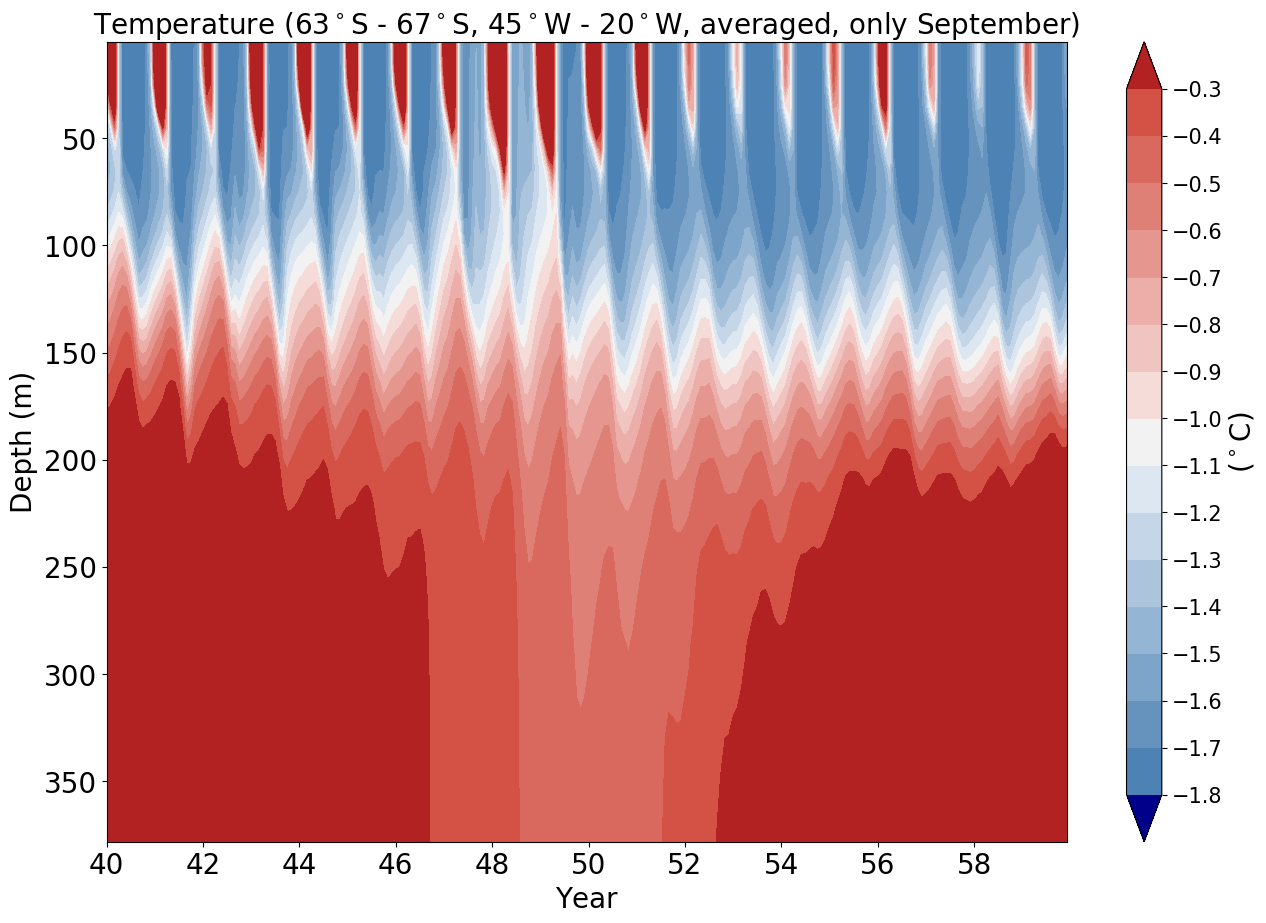

In [21]:
# plot the result
fig = plt.figure(figsize=(15, 10), dpi=100)
ax0 = fig.add_axes([0.1, 0.1, 0.8, 0.8])
im = ax0.contourf(yy[:,:30], xx[:,:30], result[:,:30],levels = nice_levels,cmap=nice_cmap,interpolation='none',extend='both')
im.cmap.set_over('firebrick')
im.cmap.set_under('darkblue')
#CS = ax0.contour(yy,xx,result, [0.8],colors = 'r', linestyles = 'solid',linewidths=1)
#plt.clabel(CS, inline=0.1, fontsize=10)
cbar = fig.colorbar(im, ax=ax0, ticks=nice_levels,extendfrac='auto')
cbar.ax.tick_params(labelsize=15)
#cbar.minorticks_on()
cbar.set_label('($^\circ$C)', **my_font)

#############################################################################
##设定X坐标值
plt.xticks(range(0,240,24), ['20', '40','60', '80', '100','120','140','160',\
                             '180','200', '220', '240', '260','280','300','320'],**my_font)
plt.xticks(range(0,240,24), ['40', '42','44', '46', '48','50','52','54',\
                             '56','58', '60'],**my_font)
plt.yticks(**my_font)
#plt.yticks(range(0,40,5), ['1', '2', '3', '4', '5','6','7','8','9'])
plt.xlabel('Year',**my_font)
plt.ylabel('Depth (m)',**my_font)
plt.gca().invert_yaxis()
ax0.set_title('Temperature (63$^\circ$S - 67$^\circ$S, 45$^\circ$W - 20$^\circ$W, averaged, only September)',**my_font)

plt.savefig("temperature2.png",bbox_inches='tight',dpi=fig.dpi)

In [16]:
result[0]

array([ 0.49952443,  0.37327486, -0.59981101, -1.13793885, -1.36833745,
       -1.46036475, -1.46338822, -1.39758846, -1.28485987, -1.14111935,
       -0.9922572 , -0.86166755, -0.74480386, -0.63724532, -0.54310331,
       -0.45578787, -0.37573581, -0.30733816, -0.2571758 , -0.22464148,
       -0.19907444, -0.17996326, -0.16557959, -0.15710917, -0.14791951,
       -0.14376744, -0.13550687, -0.13249986, -0.12597124, -0.12272447,
       -0.11837246, -0.11654157, -0.1146697 , -0.11391654, -0.11289785,
       -0.11253277, -0.11218705, -0.11029391, -0.10577505, -0.09789521,
       -0.09133002, -0.09379785, -0.11302881, -0.15045491, -0.19852064,
       -0.25164654, -0.30635055, -0.36152695, -0.41167304, -0.45835247,
       -0.50187288, -0.54201367, -0.57996518, -0.61841297, -0.66037696,
       -0.69801602, -0.72956643, -0.74346193, -0.74746544,  0.        ,
        0.        ,  0.        ])